File path: c:\Users\getne\30122-project-gitmoney\data\calls_money


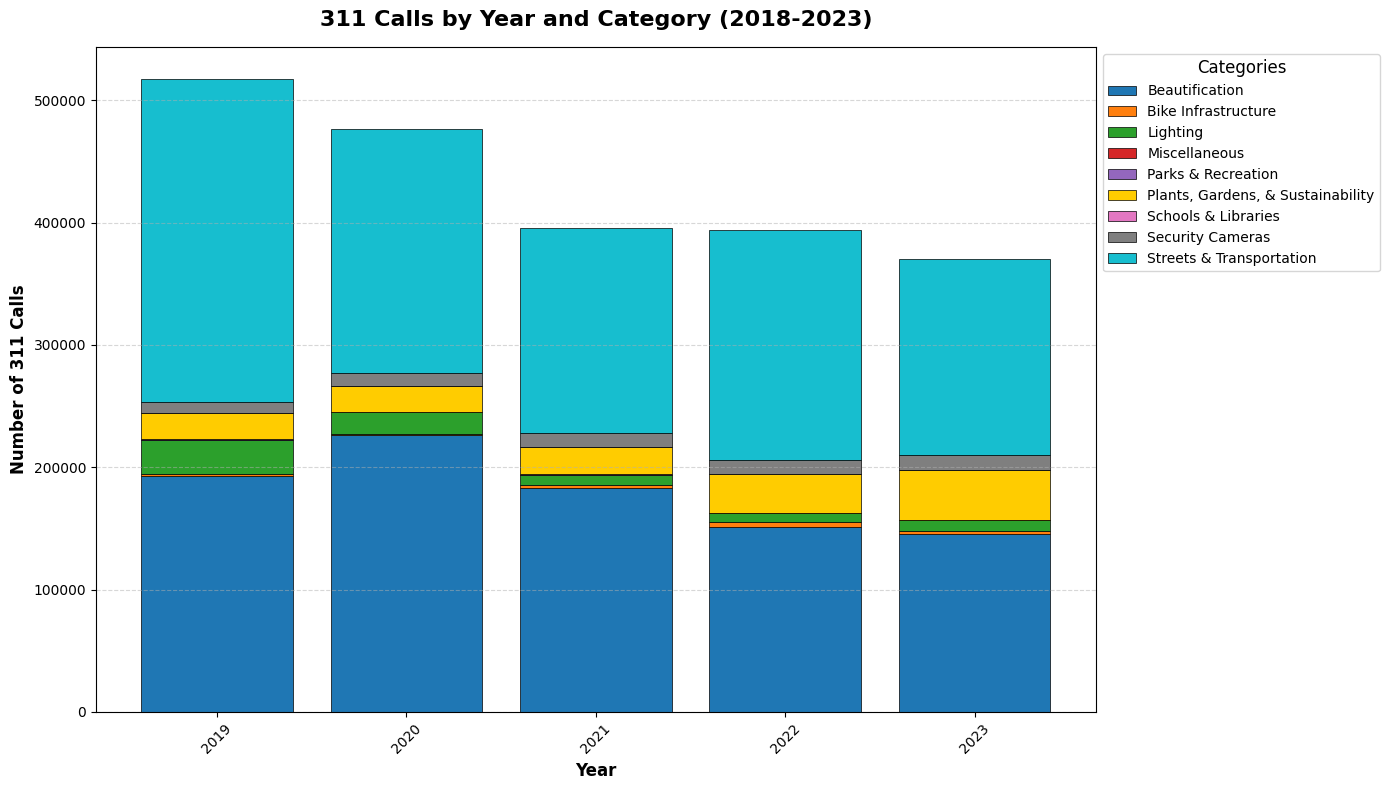

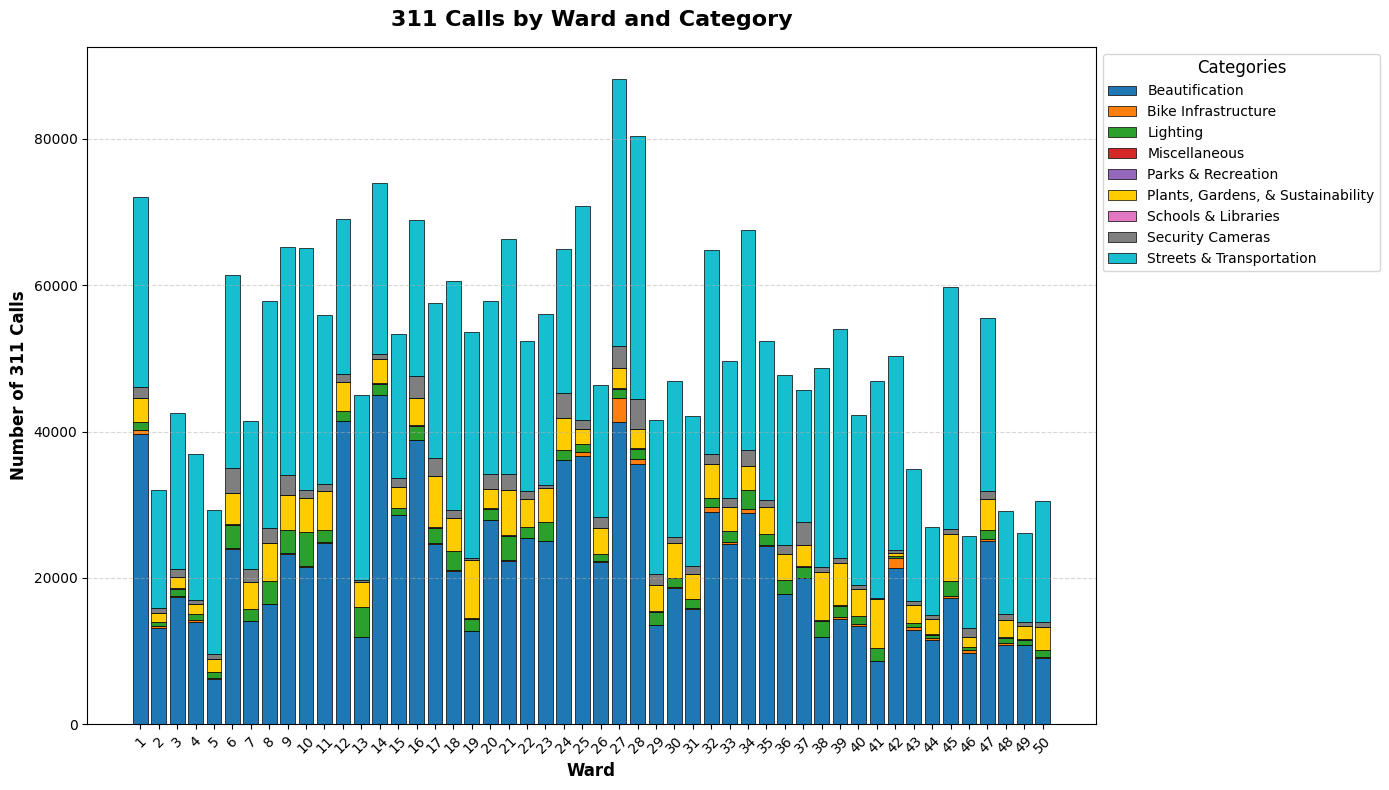

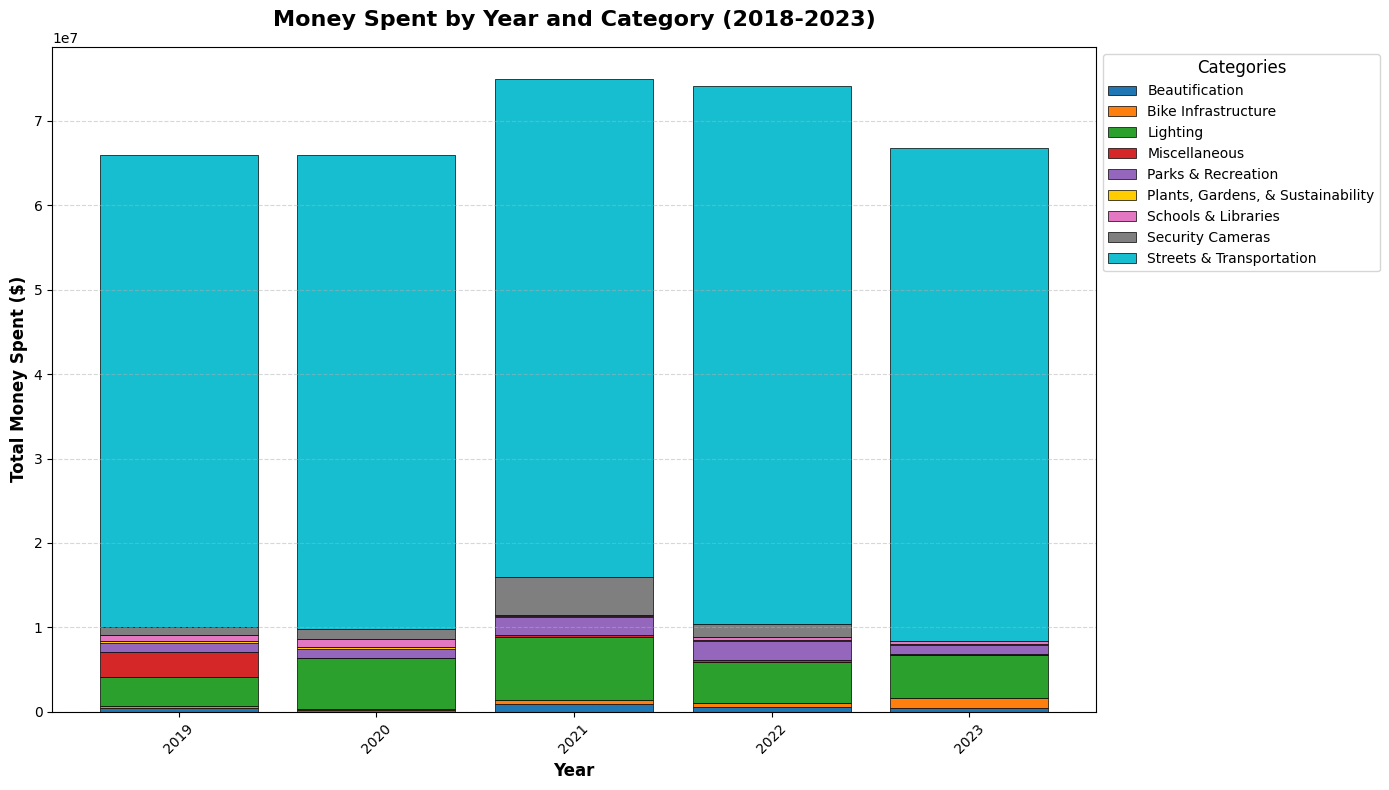

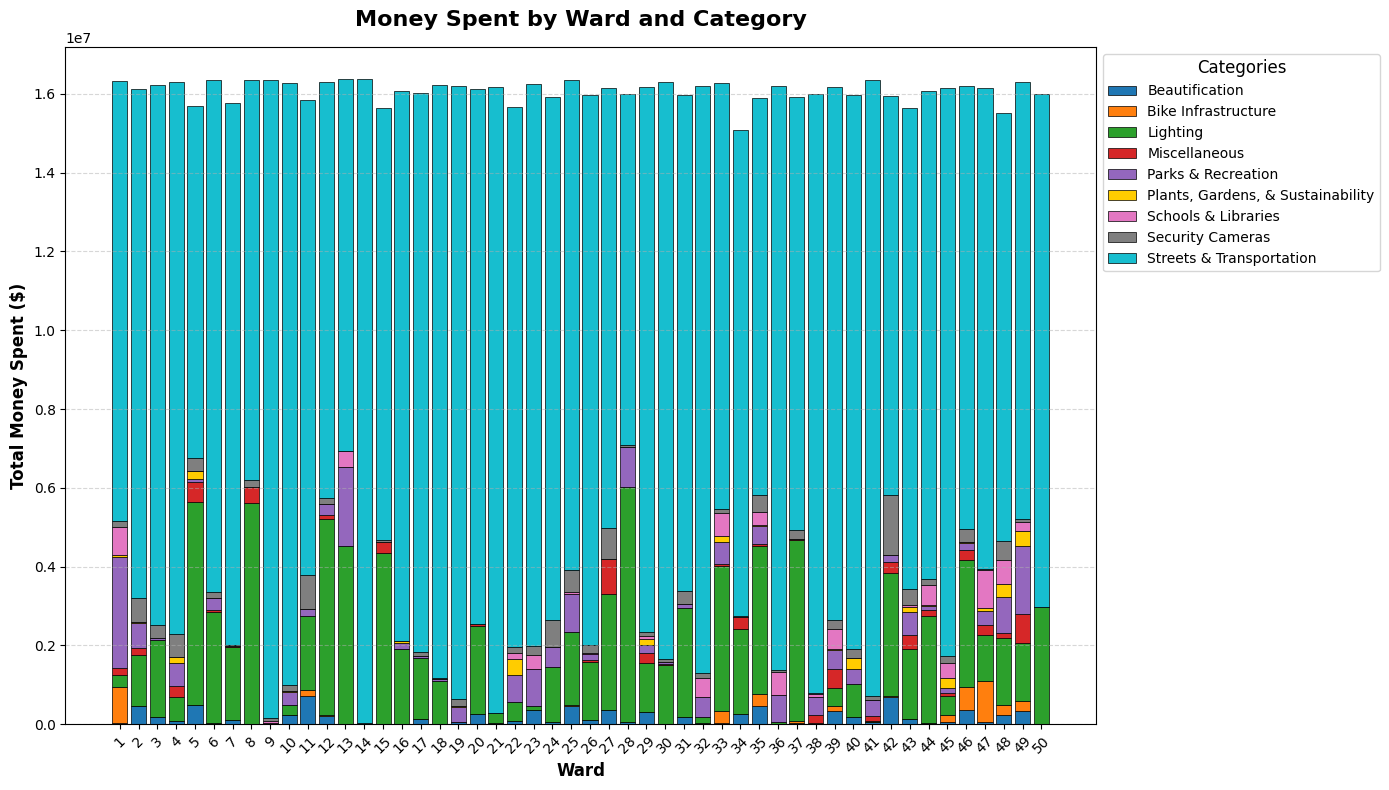

In [ ]:
# Regular Graphs with matplotib 
import csv
import pathlib
import matplotlib.pyplot as plt
from collections import defaultdict

# Define the CSV file path
csv_file = pathlib.Path.cwd().parent.parent / "30122-project-gitmoney" / "data" / "calls_money"
print(f"File path: {csv_file}")

def plot_calls_by_year_and_ward(csv_file: pathlib.Path):
    """
    Plot four stacked bar charts: calls and money spent by year and ward, categorized.

    Parameters:
        csv_file (Path): Path to CSV file with year, ward, category, calls, and total_cost

    Returns:
        None (displays four plots)
    """
    # Load CSV data with error handling
    try:
        with open(csv_file, 'r', encoding='utf-8') as f:
            reader = csv.DictReader(f)
            data = [{k.strip(): float(v) if k in ('calls', 'total_cost') else int(v) if k in ('year', 'ward') else v 
                     for k, v in row.items()} for row in reader]
    except FileNotFoundError:
        print(f"Error: File '{csv_file}' not found.")
        return

    # Single-pass aggregation
    calls_by_year = defaultdict(lambda: defaultdict(int))
    calls_by_ward = defaultdict(lambda: defaultdict(int))
    money_by_year = defaultdict(lambda: defaultdict(float))
    money_by_ward = defaultdict(lambda: defaultdict(float))

    for entry in data:
        year = entry['year']
        ward = entry['ward']
        category = entry['category']
        calls = entry['calls']
        cost = entry['total_cost']

        if 2019 <= year <= 2023:
            calls_by_year[year][category] += calls
            money_by_year[year][category] += cost
        calls_by_ward[ward][category] += calls
        money_by_ward[ward][category] += cost

    # Extract sorted keys
    years = sorted(calls_by_year.keys())
    wards = sorted(calls_by_ward.keys())
    categories = sorted(set().union(*[set(calls_by_year[y].keys()) for y in years]))

    # Optimized 10-color palette for effective visualization
    color_palette = [
        '#1f77b4',  # Dark Blue
        '#ff7f0e',  # Bright Orange
        '#2ca02c',  # Emerald Green
        '#d62728',  # Crimson Red
        '#9467bd',  # Deep Purple
        '#ffcc00',  # Golden Yellow
        '#e377c2',  # Magenta
        '#7f7f7f',  # Gray
        '#17becf',  # Teal
        '#75701F'   # Olive
    ]
    if len(categories) > len(color_palette):
        print(f"Warning: {len(categories)} categories exceed palette size ({len(color_palette)}). Colors will repeat.")
    category_colors = {cat: color_palette[i % len(color_palette)] for i, cat in enumerate(categories)}

    # Plotting function with corrected stacking
    def plot_stacked_bars(x_values, data_dict, title, x_label, y_label):
        plt.figure(figsize=(14, 8))
        bottom = [0] * len(x_values)
        for category in categories:
            values = [data_dict[x].get(category, 0) for x in x_values]
            plt.bar(x_values, values, bottom=bottom, label=category, color=category_colors[category],
                    edgecolor='black', linewidth=0.5)
            # Why: Corrected 'custom' to 'bottom' for proper stacking
            bottom = [b + v for b, v in zip(bottom, values)]
        
        plt.title(title, fontsize=16, fontweight='bold', pad=15)
        plt.xlabel(x_label, fontsize=12, fontweight='bold')
        plt.ylabel(y_label, fontsize=12, fontweight='bold')
        plt.xticks(x_values, rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.legend(title='Categories', title_fontsize=12, fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.show()

    # Plot all four charts
    plot_stacked_bars(years, calls_by_year, '311 Calls by Year and Category (2018-2023)', 'Year', 'Number of 311 Calls')
    plot_stacked_bars(wards, calls_by_ward, '311 Calls by Ward and Category', 'Ward', 'Number of 311 Calls')
    plot_stacked_bars(years, money_by_year, 'Money Spent by Year and Category (2018-2023)', 'Year', 'Total Money Spent ($)')
    plot_stacked_bars(wards, money_by_ward, 'Money Spent by Ward and Category', 'Ward', 'Total Money Spent ($)')

# Run with real data
if __name__ == "__main__":
    plot_calls_by_year_and_ward(csv_file)

In [ ]:
# 1st version with plotly 
import csv
import pathlib
from collections import defaultdict
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# CSV file path
csv_file = pathlib.Path.cwd().parent.parent / "30122-project-gitmoney" / "data" / "calls_money"
print(f"File path: {csv_file}")

def plot_calls_by_year_and_ward(csv_file: pathlib.Path):
    """
    Plot four interactive stacked bar charts: calls and money spent by year and ward, categorized.

    Parameters:
        csv_file (Path): Path to CSV file with year, ward, category, calls, and total_cost

    Returns:
        None (displays four plots)
    """
    # Load data

    with open(csv_file, 'r', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        data = [{k.strip(): float(v) if k in ('calls', 'total_cost') else int(v) if k in ('year', 'ward') else v 
                    for k, v in row.items()} for row in reader]

    # Aggregate data in one pass
    calls_by_year = defaultdict(lambda: defaultdict(int))
    calls_by_ward = defaultdict(lambda: defaultdict(int))
    money_by_year = defaultdict(lambda: defaultdict(float))
    money_by_ward = defaultdict(lambda: defaultdict(float))

    for entry in data:
        year = entry['year']
        ward = entry['ward']
        category = entry['category']
        calls = entry['calls']
        cost = entry['total_cost']

        if 2019 <= year <= 2023:  
            calls_by_year[year][category] += calls
            money_by_year[year][category] += cost
        calls_by_ward[ward][category] += calls
        money_by_ward[ward][category] += cost

    # Extract sorted keys
    years = sorted(calls_by_year.keys())
    wards = sorted(calls_by_ward.keys())
    categories = sorted(set().union(*[set(calls_by_year[y].keys()) for y in years]))

    # Use Plotly's default qualitative palette
    import plotly.express as px
    color_palette = px.colors.qualitative.D3  
    category_colors = {cat: color_palette[i % len(color_palette)] for i, cat in enumerate(categories)}

    # Interactive stacked bar chart function
    def plot_stacked_bars(x_values, data_dict, title, x_label, y_label):
        traces = []
        for category in categories:
            values = [data_dict[x].get(category, 0) for x in x_values]
            traces.append(go.Bar(
                x=x_values,
                y=values,
                name=category,
                hovertemplate=f'{category}: %{{y}}<extra></extra>',
                marker=dict(color=category_colors[category]),
            ))

        layout = go.Layout(
            title=dict(text=title, font_size=16, font_family="Arial"),
            barmode='stack',
            xaxis=dict(title=x_label, tickmode='linear', dtick=1),  
            yaxis=dict(title=y_label),
            hovermode='x unified',
            template="plotly_white",
            legend=dict(title="Categories", x=1, y=1, bgcolor="rgba(255,255,255,0.5)"),
        )

        fig = go.Figure(data=traces, layout=layout)
        fig.show()

    # Plot all four charts
    plot_stacked_bars(years, calls_by_year, '311 Calls by Year and Category (2019-2023)', 'Year', 'Number of 311 Calls')
    plot_stacked_bars(wards, calls_by_ward, '311 Calls by Ward and Category', 'Ward', 'Number of 311 Calls')
    plot_stacked_bars(years, money_by_year, 'Money Spent by Year and Category (2019-2023)', 'Year', 'Total Money Spent ($)')
    plot_stacked_bars(wards, money_by_ward, 'Money Spent by Ward and Category', 'Ward', 'Total Money Spent ($)')

if __name__ == "__main__":
    plot_calls_by_year_and_ward(csv_file)

File path: c:\Users\getne\30122-project-gitmoney\data\calls_money


In [ ]:
# 2nd Version plotly 
import csv
import pathlib
from collections import defaultdict
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# CSV file path
csv_file = pathlib.Path.cwd().parent.parent / "30122-project-gitmoney" / "data" / "calls_money"
print(f"File path: {csv_file}")

def plot_calls_by_year_and_ward(csv_file: pathlib.Path):
    """
    Plot four interactive stacked bar charts: calls and money spent by year and ward, categorized.

    Parameters:
        csv_file (Path): Path to CSV file with year, ward, category, calls, and total_cost

    Returns:
        None (displays four plots)
    """
    # Load CSV data 
  
    with open(csv_file, 'r', encoding='utf-8') as f:
        reader = csv.DictReader(f)
        data = [{k.strip(): float(v) if k in ('calls', 'total_cost') else int(v) if k in ('year', 'ward') else v 
                    for k, v in row.items()} for row in reader]
 
    # Single-pass aggregation
    calls_by_year = defaultdict(lambda: defaultdict(int))
    calls_by_ward = defaultdict(lambda: defaultdict(int))
    money_by_year = defaultdict(lambda: defaultdict(float))
    money_by_ward = defaultdict(lambda: defaultdict(float))

    for entry in data:
        year = entry['year']
        ward = entry['ward']
        category = entry['category']
        calls = entry['calls']
        cost = entry['total_cost']

        if 2019 <= year <= 2023:
            calls_by_year[year][category] += calls
            money_by_year[year][category] += cost
        calls_by_ward[ward][category] += calls
        money_by_ward[ward][category] += cost

    # Extract sorted keys
    years = sorted(calls_by_year.keys())
    wards = sorted(calls_by_ward.keys())
    categories = sorted(set().union(*[set(calls_by_year[y].keys()) for y in years]))

    # Optimized 10-color palette
    color_palette = [
        '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
        '#ffcc00', '#e377c2', '#7f7f7f', '#17becf', '#75701F'
    ]
    if len(categories) > len(color_palette):
        print(f"Warning: {len(categories)} categories exceed palette size ({len(color_palette)}).")
    category_colors = {cat: color_palette[i % len(color_palette)] for i, cat in enumerate(categories)}

    # Interactive stacked bar chart function 
    def plot_stacked_bars(x_values, data_dict, title, x_label, y_label, rotate_x=False):
        traces = []
        for category in categories:
            values = [data_dict[x].get(category, 0) for x in x_values]
            traces.append(go.Bar(
                x=x_values,
                y=values,
                name=category,
                hovertemplate='%{y}<extra></extra>',
                marker=dict(color=category_colors[category]),
                hoverinfo='y+name',
                width=0.5 if rotate_x else 0.8  
            ))

        # layout 
        layout = go.Layout(
            title=dict(text=title, font_size=16),
            barmode='stack',
            xaxis=dict(
                title=x_label,
                tickangle=45 if rotate_x else 0, 
                tickfont=dict(size=12 if rotate_x else 14),  
                tickmode='array',
                tickvals=x_values, 
                ticktext=[str(int(x)) for x in x_values],  
                automargin=True,  
                ticklen=8,  
                tickwidth=1
            ),
            yaxis=dict(title=y_label),
            hovermode='x unified',
            template="plotly_white",
            legend=dict(title="Categories", x=1, y=1, bgcolor="rgba(255,255,255,0.5)"),
            width=1000 if rotate_x else 800  
        )

        fig = go.Figure(data=traces, layout=layout)
        fig.show()

    # Plot all four charts
    plot_stacked_bars(years, calls_by_year, '311 Calls by Year and Category (2019-2023)', 'Year', 'Number of 311 Calls', rotate_x=False)
    plot_stacked_bars(wards, calls_by_ward, '311 Calls by Ward and Category', 'Ward', 'Number of 311 Calls', rotate_x=True)
    plot_stacked_bars(years, money_by_year, 'Money Spent by Year and Category (2019-2023)', 'Year', 'Total Money Spent ($)', rotate_x=False)
    plot_stacked_bars(wards, money_by_ward, 'Money Spent by Ward and Category', 'Ward', 'Total Money Spent ($)', rotate_x=True)

# Run the real data
if __name__ == "__main__":
    plot_calls_by_year_and_ward(csv_file)

File path: c:\Users\getne\30122-project-gitmoney\data\calls_money
